In [131]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42);


In [132]:
X = np.linspace(0, 5, 5)
y_true = (X * 2 + 2) + np.random.random(X.shape) * 5

In [216]:
def square_distance_lose_fn(y_true, bias, slope):
    # (y_true_0 - (bias + X_0 * slope))^2 + ... + (y_true_n - (bias + X_n * slope))^2
    return np.sum(np.square(y_true - (bias + slope * X)))

def d_sd_for_bias(y_true, bias, slope):
    # d / d * bias =
    # = -2 * (y_true_0 - (bias + X_0 * slope)) + ... + -2 * (y_true_n - (bias + X_n * slope)) =
    # = -2 * (y_true_0 - (bias + X_0 * slope) + ... + y_true_n - (bias + X_n * slope))
    return -2 * np.sum(y_true - (bias + slope * X))

def d_sd_for_slope(y_true, bias, slope):
    # d / d * slope =
    # = -2 * X_0 * (y_true_0 - (bias + X_0 * slope)) + ... + -2 * X_n * (y_true_n - (bias + X_n * slope))
    # = -2 * (X_0 * (y_true_0 - (bias + X_0 * slope)) + ... + X_n * (y_true_n - (bias + X_n * slope)))
    return -2 * np.sum((y_true - (bias + slope * X)) * X)

In [276]:
bias = np.random.randint(10)
slope = np.random.randint(10)

In [303]:
epochs = 100

next_bias = bias
next_slope = slope
prev_error = 0
for epoch in range(epochs):
    # Get line slope for bias
    line_slope_bias = d_sd_for_bias(y_true, next_bias, next_slope)

    # Get line slope for slope
    line_slope_slope = d_sd_for_slope(y_true, next_bias, next_slope)

    # Get step size for both
    learning_rate = 0.01
    step_size_bias = learning_rate * line_slope_bias
    step_size_slope = learning_rate * line_slope_slope

    # Got to descending direction
    next_bias = next_bias - step_size_bias
    next_slope = next_slope - step_size_slope

    error = square_distance_lose_fn(y_true, next_bias, next_slope)

    if (np.abs(prev_error - error)) < 0.001:
        print('Price is to small', prev_error - error)
        print('Epoch', epoch)
        break

    prev_error = square_distance_lose_fn(y_true, next_bias, next_slope)

Price is to small 0.0009483984398386269
Epoch 55


7.990420650769884

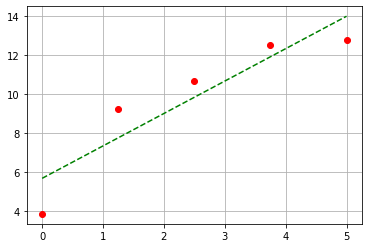

In [304]:
plt.plot(X, y_true, 'ro')
plt.grid(True)
plt.plot(X, next_bias + next_slope * X, 'g--')

square_distance_lose_fn(y_true, next_bias, next_slope)